
**Convolution Neural** **Network**


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [14]:

## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

In [16]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

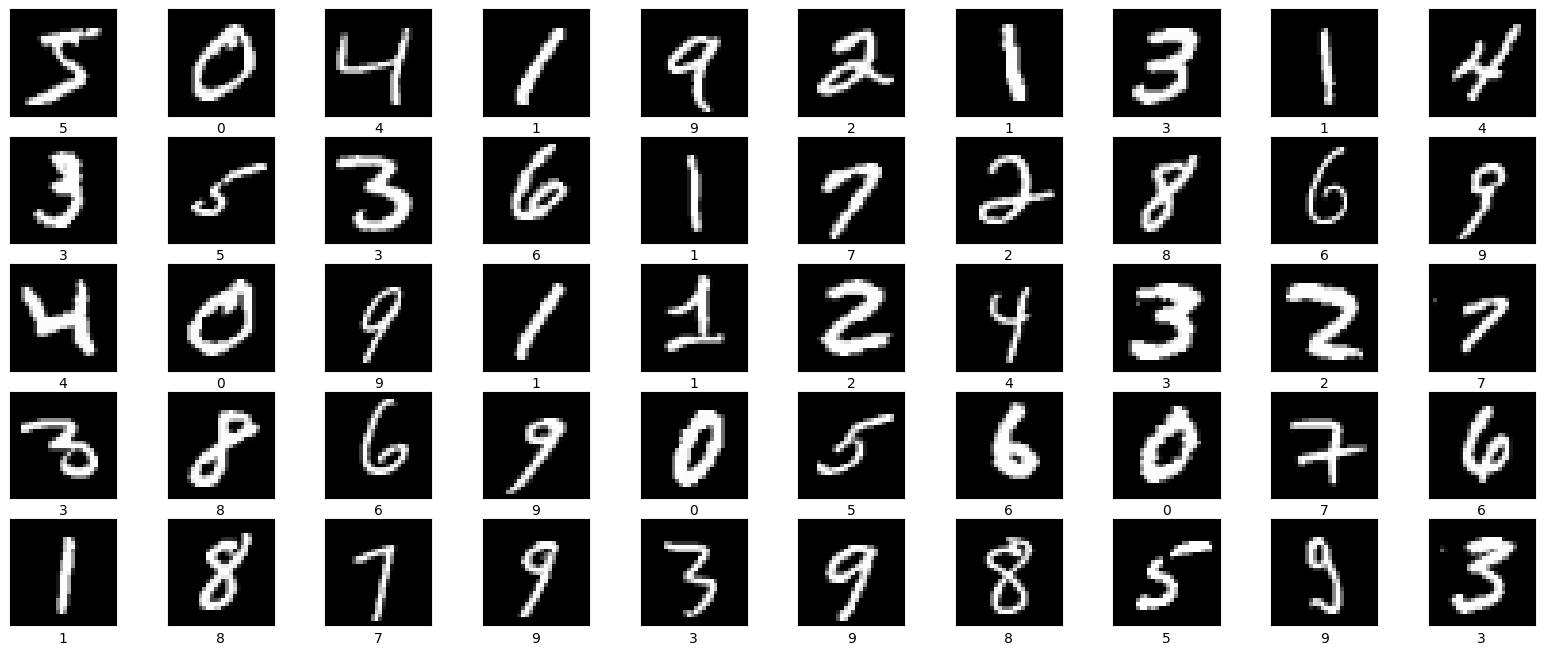

In [17]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i]])
plt.show()


In [18]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [19]:
# CNN Model

model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
# Train Model
h = model.fit(
    X_train, Y_train,
    epochs=5,
    validation_split=0.2,
    batch_size=32
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8859 - loss: 0.3599 - val_accuracy: 0.9778 - val_loss: 0.0722
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9830 - loss: 0.0534 - val_accuracy: 0.9860 - val_loss: 0.0438
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9868 - val_loss: 0.0451
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9916 - loss: 0.0244 - val_accuracy: 0.9878 - val_loss: 0.0393
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9945 - loss: 0.0161 - val_accuracy: 0.9867 - val_loss: 0.0443


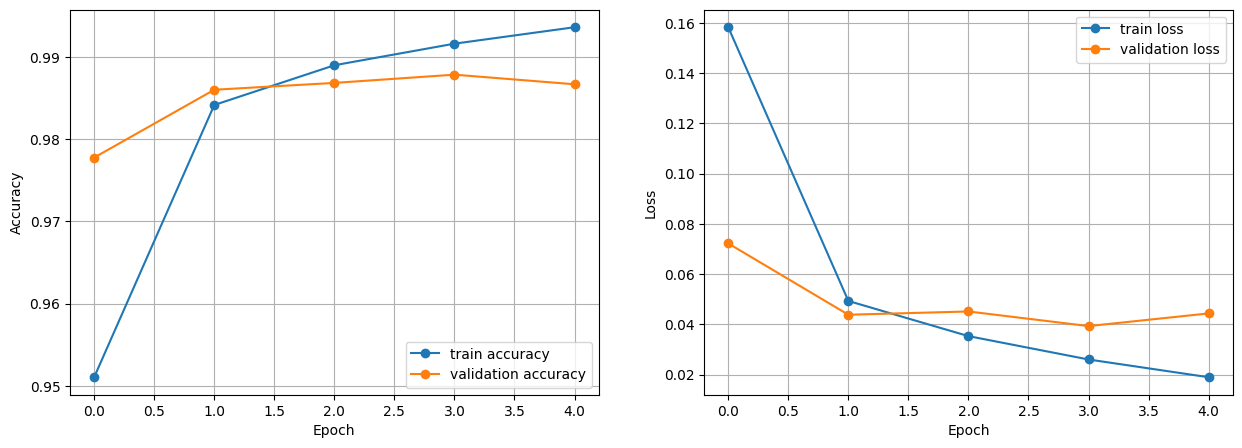

In [22]:
# Plot Accuracy & Loss
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [23]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('Test Loss:', test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9843 - loss: 0.0526

Test Accuracy: 0.9876999855041504
Test Loss: 0.04069272801280022


In [24]:
# Predictions
predictions = model.predict(X_test)

print(predictions[0])
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", Y_test[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
[4.9787546e-11 3.4117939e-08 5.5871588e-08 1.0830304e-06 6.3986205e-10
 4.3493817e-09 5.1906433e-14 9.9999887e-01 2.9754377e-09 5.5257434e-08]
Predicted label: 7
True label: 7


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
[4.9787546e-11 3.4117939e-08 5.5871588e-08 1.0830304e-06 6.3986205e-10
 4.3493817e-09 5.1906433e-14 9.9999887e-01 2.9754377e-09 5.5257434e-08]
Predicted label: 7
True label: 7


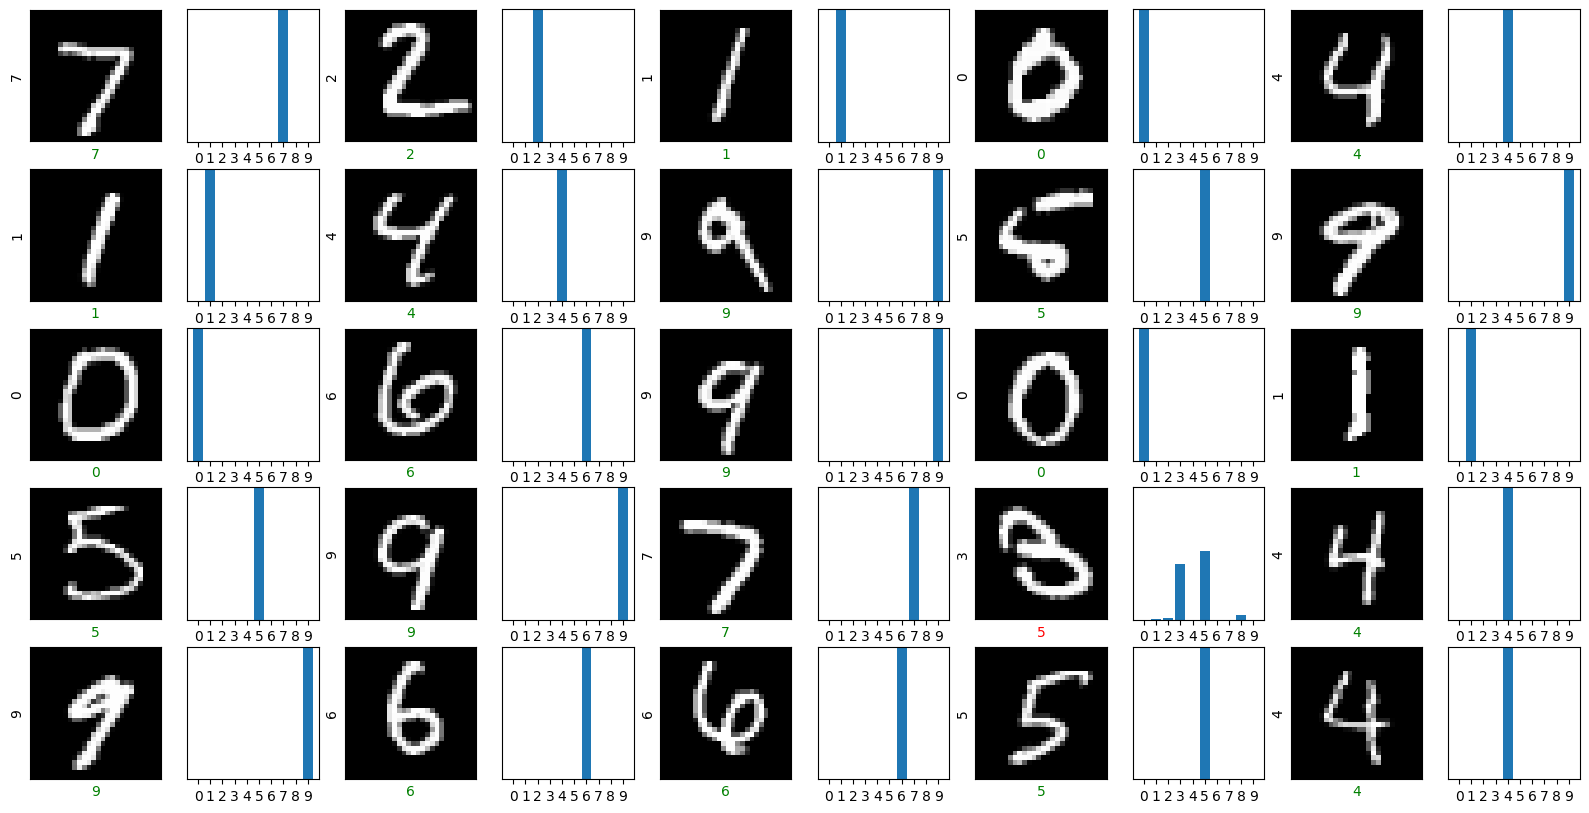

In [25]:
# Predictions
predictions = model.predict(X_test)

print(predictions[0])
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", Y_test[0])

rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i]])

    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0,1])

plt.show()